In [352]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc,roc_auc_score  # 计算roc和auc
from sklearn.model_selection import train_test_split


In [273]:
dataset = pd.read_excel("Product_Reviewer_Features_Label_contentsimilarity.xlsx")

In [274]:
data_ratio = 0.082 # select 10% of geniune geniune in original dataset with total spam samples
random_seed = 100

sampledataframe = dataset[dataset["Label"]==0].sample(frac=data_ratio, random_state=random_seed)

sampledataframe=pd.concat([sampledataframe,dataset[dataset["Label"]==1]])

Counter(sampledataframe["Label"])

Counter({0: 6889, 1: 6898})

In [275]:
train_data_ratio = 0.6 #select 60% of samples as training dataset, 20% of samples as valid dataset, the rest as test dataset
valid_data_ratio = 0.5
random_seed1 = 388
random_seed2 = 699
train_dataframe = sampledataframe.sample(frac=train_data_ratio, random_state=random_seed1)
valid_dataframe = sampledataframe.drop(train_dataframe.index).sample(frac = valid_data_ratio, random_state=random_seed2)
test_dataframe = sampledataframe.drop(train_dataframe.index.append(valid_dataframe.index))

print(Counter(train_dataframe["Label"]))
print(Counter(valid_dataframe["Label"]))
print(Counter(test_dataframe["Label"]))

Counter({1: 4149, 0: 4123})
Counter({1: 1392, 0: 1366})
Counter({0: 1400, 1: 1357})


In [276]:
train_dataframe.head()

,Reviewer_id,Product_id,Reviewer_ReviewContent_Sent_len,Reviewer_ReviewContent_SUB_Len,Reviewer_ReviewContent_OBJ_Len,Reviewer_ReviewContent_First_Third_PRP,Reviewer_ReviewContent_First_Third_PRP_ratio,Reviewer_ReviewContent_Second_PRP,Reviewer_ReviewContent_Second_PRP_ratio,Reviewer_ReviewContent_avg_sent_len,...,Product_Behavior_group_toprating_rating_ratio,Product_Behavior_group_buttomrating_rating_ratio,Product_Behavior_group_posrating_rating_ratio,Product_Behavior_group_negrating_rating_ratio,Product_Behavior_Early_Review_Ratio,Text,Rating,Label,Reviewer_content_consine_similarity,Product_content_consine_similarity
38508,13025,337,93,3,0,0,0.000000,0,0.000000,163.666667,...,0.095833,0.008333,0.095833,0.037500,0.017241,This place is highly recommended! The food is ...,4,0,0.029834,0.117581
70057,39806,133,320,8,6,3,0.009375,0,0.000000,425.333333,...,0.093628,0.009103,0.093628,0.031209,0.005263,So I went to this place for breakfast and must...,4,0,0.034625,0.072036
79011,56726,508,142,5,3,3,0.021127,0,0.000000,159.428571,...,0.082126,0.003623,0.082126,0.032609,0.029557,Went here for a nice lunch and that's what I g...,5,0,0.086202,0.098920
88360,95235,718,152,2,5,1,0.006579,1,0.006579,187.666667,...,0.109948,0.005236,0.109948,0.015707,0.021739,it has its own unique style but I wasnt thrill...,2,1,0.061172,0.131702
41228,14388,276,145,3,2,0,0.000000,2,0.013793,186.000000,...,0.074144,0.005703,0.074144,0.053232,0.007463,"Good food, but the wait. The wait! Maybe I'm t...",3,1,0.059694,0.113649


In [277]:
columns = train_dataframe.columns.tolist()

Text(0.5, 1.0, 'Ranking Distribution in different Label group')

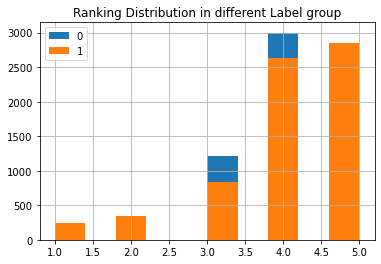

In [431]:
sampledataframe.groupby("Label")["Rating"].hist(legend=True)
plt.title("Ranking Distribution in different Label group")

In [278]:
columns.remove("Label")

In [279]:
features = columns[2:]

In [280]:
features

['Reviewer_ReviewContent_Sent_len',
 'Reviewer_ReviewContent_SUB_Len',
 'Reviewer_ReviewContent_OBJ_Len',
 'Reviewer_ReviewContent_First_Third_PRP',
 'Reviewer_ReviewContent_First_Third_PRP_ratio',
 'Reviewer_ReviewContent_Second_PRP',
 'Reviewer_ReviewContent_Second_PRP_ratio',
 'Reviewer_ReviewContent_avg_sent_len',
 'Reviewer_ReviewContent_avg_first_third_ratio',
 'Reviewer_ReviewContent_avg_second_ratio',
 'Reviewer_ReviewContent_avg_sub_ratio',
 'Reviewer_ReviewContent_avg_obj_ratio',
 'Reviewer_ReviewContent_avg_sub_to_allpro_ratio',
 'Reviewer_ReviewContent_avg_obj_to_allpro_ratio',
 'Reviewer_Average_Rank',
 'Reviewer_Rank_SD',
 'Reviewer_Behavior_group_rank_common',
 'Reviewer_Behavior_group_extreme_rating_ratio',
 'Reviewer_Behavior_group_toprating_rating_ratio',
 'Reviewer_Behavior_group_buttomrating_rating_ratio',
 'Reviewer_Behavior_group_posrating_rating_ratio',
 'Reviewer_Behavior_group_negrating_rating_ratio',
 'Reviewer_Behavior_Early_Review_Ratio',
 'Product_ReviewCon

In [281]:
features.remove("Rating")
features.remove("Text")

In [282]:
features

['Reviewer_ReviewContent_Sent_len',
 'Reviewer_ReviewContent_SUB_Len',
 'Reviewer_ReviewContent_OBJ_Len',
 'Reviewer_ReviewContent_First_Third_PRP',
 'Reviewer_ReviewContent_First_Third_PRP_ratio',
 'Reviewer_ReviewContent_Second_PRP',
 'Reviewer_ReviewContent_Second_PRP_ratio',
 'Reviewer_ReviewContent_avg_sent_len',
 'Reviewer_ReviewContent_avg_first_third_ratio',
 'Reviewer_ReviewContent_avg_second_ratio',
 'Reviewer_ReviewContent_avg_sub_ratio',
 'Reviewer_ReviewContent_avg_obj_ratio',
 'Reviewer_ReviewContent_avg_sub_to_allpro_ratio',
 'Reviewer_ReviewContent_avg_obj_to_allpro_ratio',
 'Reviewer_Average_Rank',
 'Reviewer_Rank_SD',
 'Reviewer_Behavior_group_rank_common',
 'Reviewer_Behavior_group_extreme_rating_ratio',
 'Reviewer_Behavior_group_toprating_rating_ratio',
 'Reviewer_Behavior_group_buttomrating_rating_ratio',
 'Reviewer_Behavior_group_posrating_rating_ratio',
 'Reviewer_Behavior_group_negrating_rating_ratio',
 'Reviewer_Behavior_Early_Review_Ratio',
 'Product_ReviewCon

In [283]:
#All features in Product_centric & Reviewer_centric
features_Product_Reviewer = features[:-2]

In [284]:
#All features in Product_centric & Reviewer_centric & Reviewer_content_similarity
features_Product_Reviewer_Reviewer_conten_sim = features[:-1]

In [285]:
#All features in Product_centric & Reviewer_centric & Product_content_similarity
features_Product_Reviewer_Product_conten_sim = features[:-2]
features_Product_Reviewer_Product_conten_sim.append(features[-1])

In [286]:
#All features in Reviewer_reviewcontent
features_Reviewer_ReviewContent = features[:14]

In [287]:
#All features in Reviewer_Behavior
features_Reviewer_Behavior = features[14:23]

In [288]:
#All features in Product_reviewcontent
features_Product_ReviewContent = features[23:37]

In [374]:
#All features in Product_Behavior
features_Product_Behavior = features[37:46]

In [389]:
#把features 改成什么不同的features后缀去下面Train，就是不同features的测试值
train_X = train_dataframe[features]
train_Y = train_dataframe["Label"]
valid_X = valid_dataframe[features]
valid_Y = valid_dataframe["Label"]

In [350]:
train_X = train_dataframe[features_Product_Reviewer_Product_conten_sim]
train_Y = train_dataframe["Label"]
valid_X = valid_dataframe[features_Product_Reviewer_Product_conten_sim]
valid_Y = valid_dataframe["Label"]

In [400]:
test_X = test_dataframe[features]
test_Y = test_dataframe["Label"]

In [378]:
features_Reviewer_Behavior

['Reviewer_Average_Rank',
 'Reviewer_Rank_SD',
 'Reviewer_Behavior_group_rank_common',
 'Reviewer_Behavior_group_extreme_rating_ratio',
 'Reviewer_Behavior_group_toprating_rating_ratio',
 'Reviewer_Behavior_group_buttomrating_rating_ratio',
 'Reviewer_Behavior_group_posrating_rating_ratio',
 'Reviewer_Behavior_group_negrating_rating_ratio',
 'Reviewer_Behavior_Early_Review_Ratio']

# Train

In [381]:
feature_dic = {"Product-centric+Reviewer-centric Features":features_Product_Reviewer,
               "Product Behavior Features": features_Product_Behavior,
               "Product Review Content Features":features_Reviewer_Behavior,
               "Reviewer Behavior Features": features_Reviewer_Behavior,
               "Reviewer Review Content Features": features_Reviewer_ReviewContent,
               "Product + Reviewer centric + Product Content Similarity": features_Product_Reviewer_Product_conten_sim,
               "Product + Reviewer centric + Reviewer Content Similarity": features_Product_Reviewer_Reviewer_conten_sim,
               "All Features":features}

In [388]:
from sklearn.metrics import plot_confusion_matrix

In [391]:
knn_model = KNeighborsClassifier(5)


<Figure size 720x720 with 0 Axes>

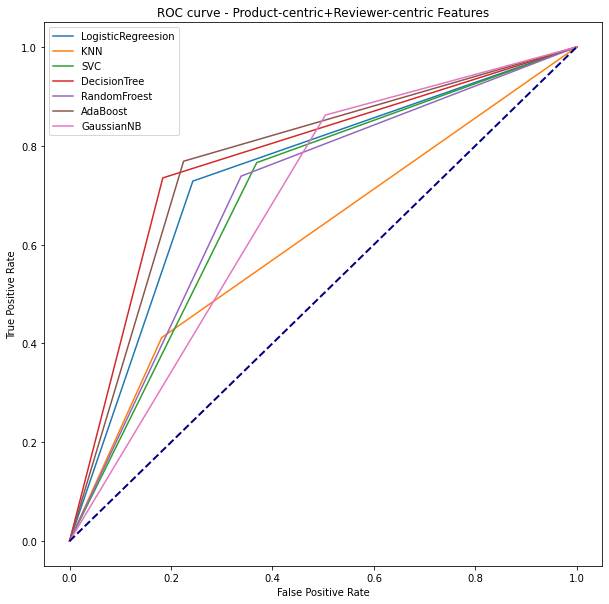

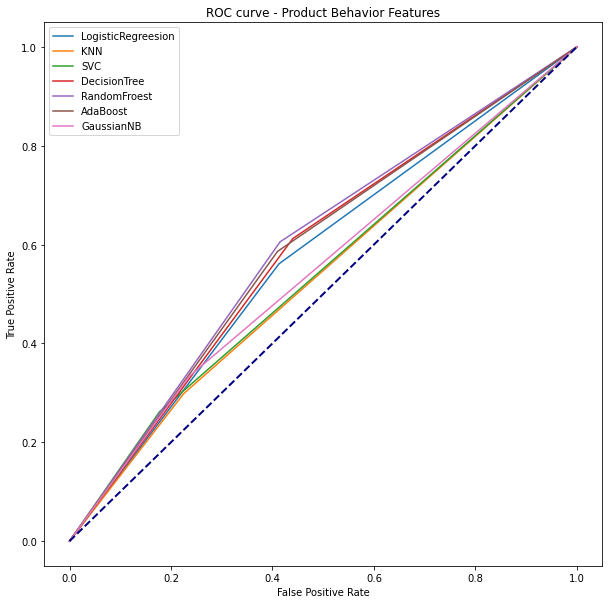

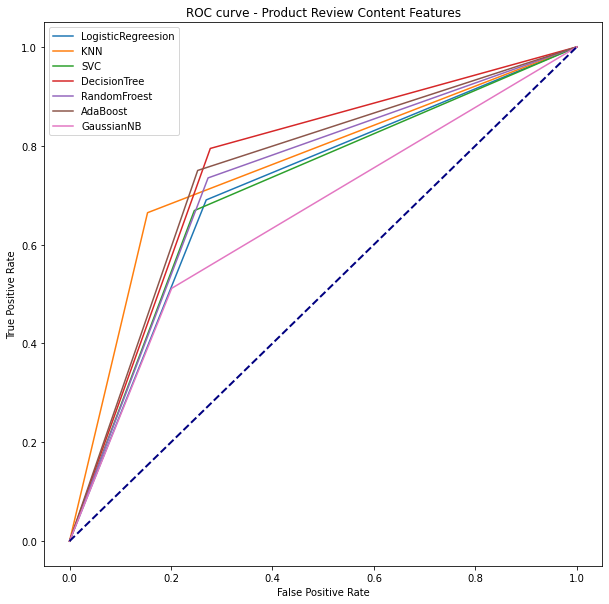

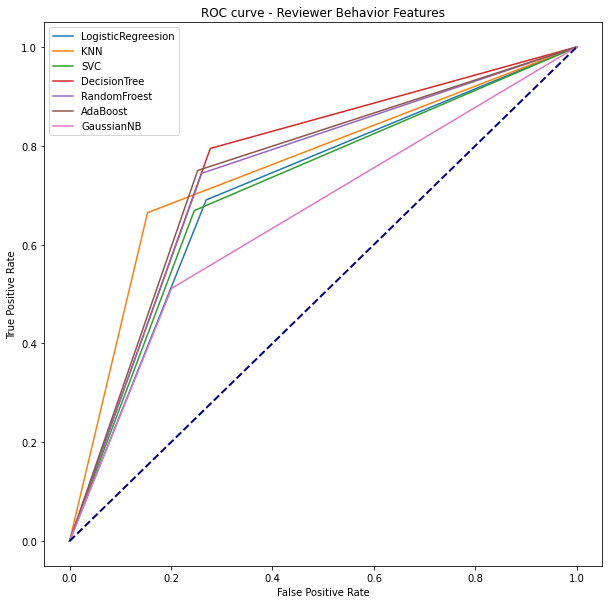

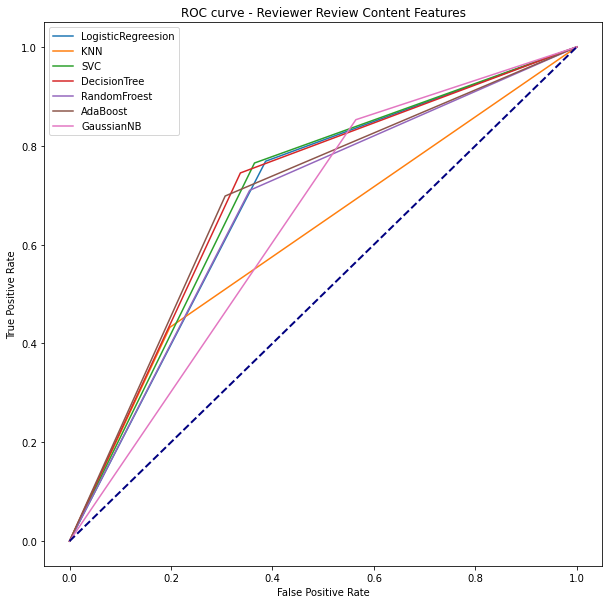

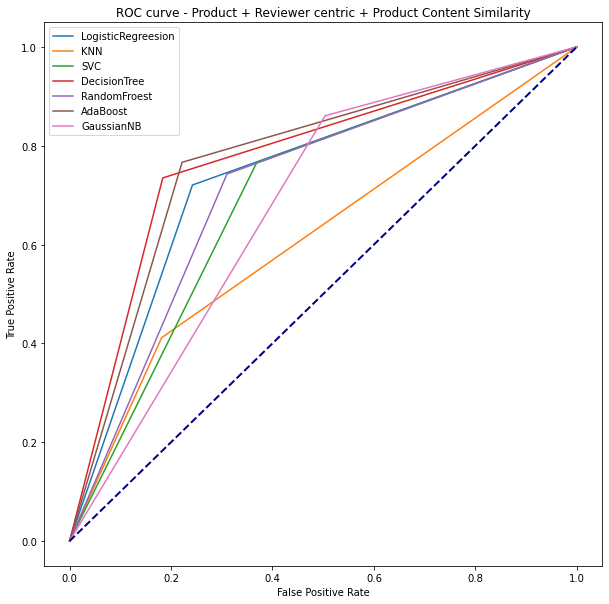

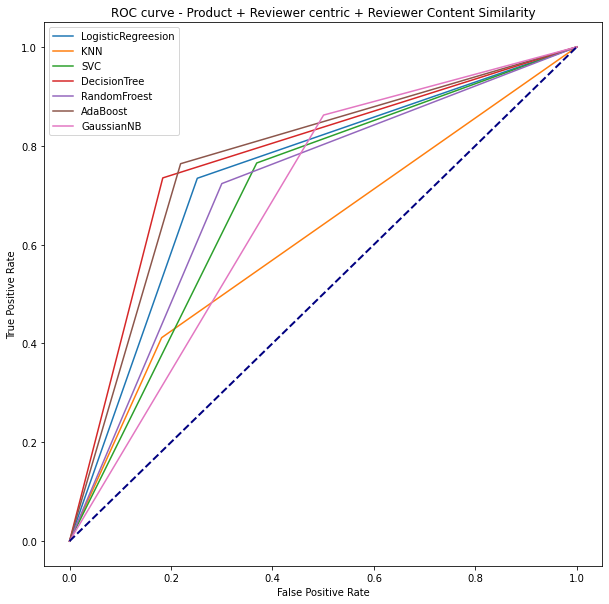

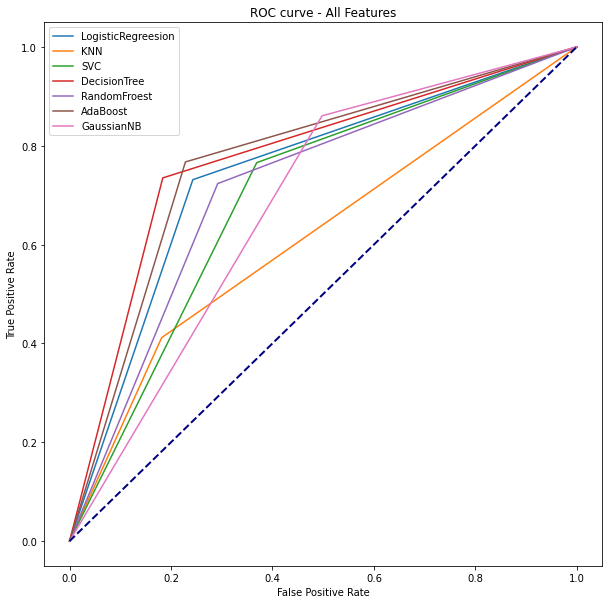

In [392]:

lr_model = LogisticRegression(C = 1, solver='liblinear')
knn_model = KNeighborsClassifier(2)
svc_model = SVC()
dec_model = DecisionTreeClassifier(max_depth=10)
rfc_model = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1)
adb_model = AdaBoostClassifier()
gnb = GaussianNB()

accu = {}
precision = {}
recall = {}
f1 = {}
roc_auc ={}
fig = plt.figure(figsize=(10,10))


model_dic = {"LogisticRegreesion":lr_model,
             "KNN": knn_model,
             "SVC":svc_model,
             "DecisionTree":dec_model,
             "RandomFroest":rfc_model,
             "AdaBoost":adb_model,   
             "GaussianNB":gnb}



for feature_name,feature in feature_dic.items():
    accu = {}
    precision = {}
    recall = {}
    f1 = {}
    roc_auc ={}
    fig = plt.figure(figsize=(10,10))
    
    train_X = train_dataframe[feature]
    valid_X = valid_dataframe[feature]
    
    for model_name,dicmodel in model_dic.items():
        trainmodel = dicmodel.fit(train_X,train_Y)
        valid_Y_hat = dicmodel.predict(valid_X)
        accuracy = accuracy_score(valid_Y, valid_Y_hat)
        accu[model_name]=accuracy

        precision[model_name] = metrics.precision_score(valid_Y, valid_Y_hat)
        recall[model_name] = metrics.recall_score(valid_Y, valid_Y_hat)
        f1[model_name] = metrics.f1_score(valid_Y, valid_Y_hat)

        fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)

        auc = roc_auc_score(valid_Y, valid_Y_hat)
        roc_auc[model_name]=auc

        plt.plot(fpr,tpr,label=model_name)
        plt.legend(loc='best')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - {}'.format(feature_name))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')



In [355]:
accu

{'LogisticRegreesion': 0.7389412617839014,
 'KNN': 0.6131254532269761,
 'SVC': 0.6990572878897752,
 'DecisionTree': 0.7751994198694706,
 'RandomFroest': 0.6885424220449601,
 'AdaBoost': 0.7722987672226251,
 'GaussianNB': 0.6802030456852792}

In [ ]:
dec_model = DecisionTreeClassifier(max_depth=10)
rfc_model = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1)

In [ ]:

knn_model = KNeighborsClassifier(2)


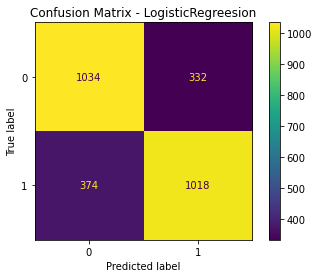

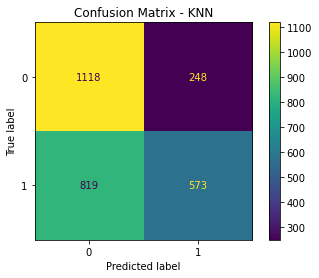

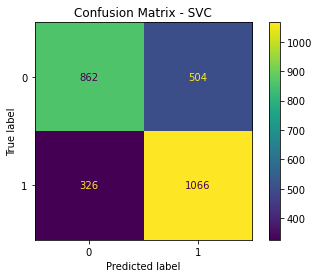

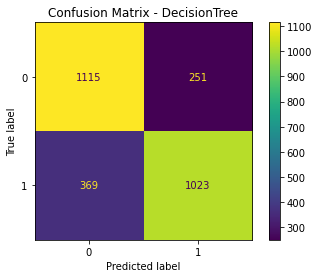

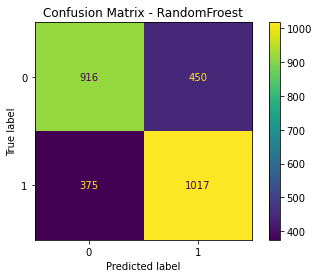

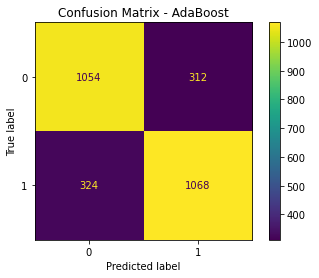

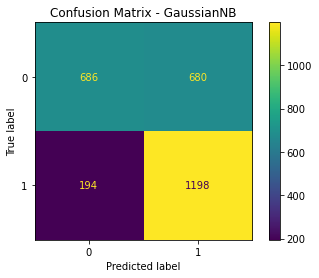

In [393]:
for model_name,dicmodel in model_dic.items():
    trainmodel = dicmodel.fit(train_X,train_Y)
    valid_Y_hat = dicmodel.predict(valid_X)
    
    plot_confusion_matrix(dicmodel, valid_X, valid_Y)  
    plt.title('Confusion Matrix - {}'.format(model_name))
    plt.savefig("{}.png".format(model_name))


In [394]:
roc_auc

{'LogisticRegreesion': 0.7441382255431581,
 'KNN': 0.6150429772302721,
 'SVC': 0.6984220645899598,
 'DecisionTree': 0.7755828116322512,
 'RandomFroest': 0.7156629179919557,
 'AdaBoost': 0.7694186398747918,
 'GaussianNB': 0.6814141885865266}

In [322]:
import seaborn as sns
import  matplotlib.pyplot as plt

In [385]:
feature_importance = dict(zip(features,lr_model.coef_[0]))
feature_importance_sorted  = sorted(feature_importance.items(),key = lambda kv: kv[1],reverse=True)[1:20]

In [386]:
key = []
value = []
for item in feature_importance_sorted:
    key.append(item[0])
    value.append(item[1])
feature_importance_sorted[0][1]

0.9174282535789765

In [384]:
trainmodel = lr_model.fit(train_X,train_Y)
valid_Y_hat = lr_model.predict(valid_X)
accuracy = accuracy_score(valid_Y, valid_Y_hat)
accu[model_name]=accuracy

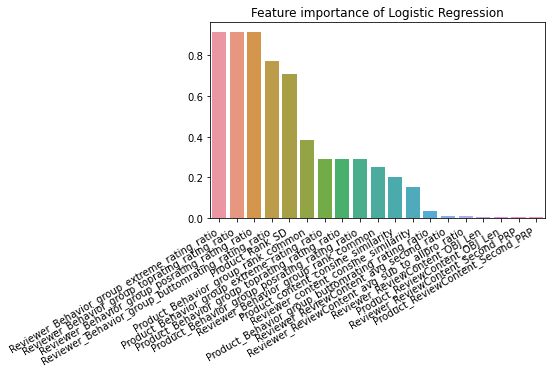

In [387]:
fig,ax = plt.subplots()
sns.barplot(x=key,y=value,ax=ax).set(title = "Feature importance of Logistic Regression")
ax.set_xticklabels(key)
xtix = ax.get_xticks()
fig.autofmt_xdate()

In [142]:
train_dataframe[["Text","Label"]].to_csv("train_dataset.csv",index=False)

In [143]:
valid_dataframe[["Text","Label"]].to_csv("valid_dataset.csv",index=False)

In [144]:
test_dataframe[["Text","Label"]].to_csv("test_dataset.csv",index=False)

In [164]:
reviewer_similarity = train_dataframe.groupby(["Label","Reviewer_id"])["Reviewer_content_consine_similarity"].agg(['mean'])

In [173]:
reviewer_similarity

mean
Label Reviewer_id          
0     940          0.062782
      947          0.060574
      950          0.095732
      953          0.102143
      959          0.101320
...                     ...
1     136663       0.273318
      138746       0.035196
      139068       0.074172
      140512       0.037545
      146796       0.050485

[4845 rows x 1 columns]

In [175]:
Counter(reviewer_similarity.reset_index()["Label"])

Counter({0: 3353, 1: 1492})

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

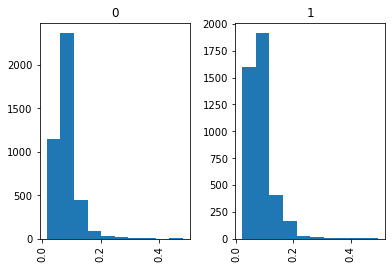

In [348]:
train_dataframe["Reviewer_content_consine_similarity"].hist(by=train_dataframe["Label"])

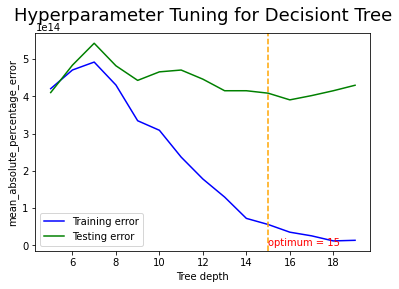

In [398]:
max_depths = range(5, 20)
testing_error = []
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(train_X, train_Y)
    training_error.append(mean_absolute_percentage_error(train_Y, model_1.predict(train_X).astype(int)))
    testing_error.append(mean_absolute_percentage_error(valid_Y, model_1.predict(valid_X).astype(int)))
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=15, color='orange', linestyle='--')
plt.annotate('optimum = 15', xy=(15, 0.1), color='red')
plt.ylabel('mean_absolute_percentage_error')
plt.title('Hyperparameter Tuning for Decisiont Tree', fontsize = 18, y = 1.03)
plt.legend()

In [396]:
from sklearn.metrics import mean_absolute_percentage_error


0.8226976069615664

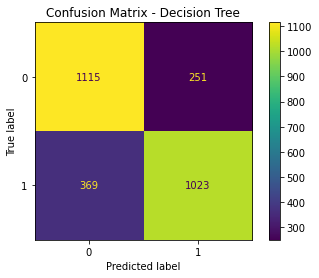

In [399]:
decmodel = DecisionTreeClassifier(max_depth=15)
trainmodel = decmodel.fit(train_X,train_Y)
valid_Y_hat = decmodel.predict(valid_X)
plot_confusion_matrix(dec_model, valid_X, valid_Y)  
plt.title('Confusion Matrix - Decision Tree')
accuracy_score(valid_Y,valid_Y_hat)


In [403]:
train_Y_hat = decmodel.predict(train_X)
accuracy_score(train_Y,train_Y_hat)


0.9816247582205029

In [401]:
test_Y_hat = decmodel.predict(test_X)
accuracy_score(test_Y,test_Y_hat)


0.808487486398259

0.808487486398259

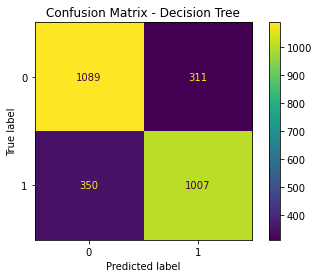

In [402]:
plot_confusion_matrix(dec_model, test_X, test_Y)  
plt.title('Confusion Matrix - Decision Tree')
accuracy_score(test_Y,test_Y_hat)

In [404]:
test_Y_hat

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [415]:

Errordataframe = test_dataframe.loc[test_Y[test_Y!=test_Y_hat].index,["Text","Label"]]
    

In [423]:
Errordataframe.loc[Errordataframe["Label"]==0,"Text"].tolist()
    

['Everything about this place is genius. We had a hard time deciding what to get because there were so many great options. The chocolate peanut butter banana was delicious and I was surprised that my favorite was the berry parfait. DELICIOUS! Best crepe in new york.',
 "Congratulations, if you are reading this review it means you are already well on your way to tasting pizza perfection. I went on a Sunday night (6:00 PM) and had very little wait. Â\xa0We ordered right away and were eating within 30 minutes. If you consider yourself a pizza fan and haven't eaten here yet, you have to go. Â\xa0It's worth the hype. You can taste with every bite that you are eating the finest of ingredients. Â\xa0The sauce is about as good a sauce as you will ever have. Seacrest out",
 'Amazing brunch/lunch/dessert place!!!! I don\'t give five stars much. But this place deserves it!! I get the Croque Madame with an egg on it every single time. It\'s a combo of a flakey buttery croissant topped with layers 

In [424]:
Errordataframe.loc[Errordataframe["Label"]==1,"Text"].tolist()


['Love this place! Â\xa0Try the Chicken sandwich or the Roasted Chicken. Â\xa0Those are winners every time. Â\xa0Really delicious and worth the wait.',
 "I'm not a big fan of Italian food but I really enjoyed my food here. The risotto balls were very cheesy...it tasted like cheetos to me. Â\xa0Definitely get this! Creamy Lobster Maccheroni and Cheese was SUPERB! The sauce was perfect, the lobster was cooked to perfection, everything about this dish was great.",
 "I just moved to the area so I keep finding little things that really warms me up to my new home. Dekalb is certainly of those places a hidden gem. My friend and I were looking for places that would accommodate her special diet. Saw a sign for warm soup. From the outside look like all the other apartments near it just with a garage door not to far from the door making a slight difference. Well I'm glad they had that little sign up. We went in to find a warm place with warm colors of wood and the smell of fresh coffee just brewe